In [0]:
import tensorflow as tf

In [0]:
import tensorflow_datasets as tfds

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
datasets,metadata=tfds.load('mnist',as_supervised=True,with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
dataset_train,dataset_test=datasets['train'],datasets['test']

In [0]:
metadata.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [0]:
num_train=metadata.splits['train'].num_examples
num_test=metadata.splits['test'].num_examples

In [0]:
def normalize(images,labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return(images,labels)

In [0]:
dataset_train=dataset_train.map(normalize)

In [0]:
dataset_test=dataset_test.map(normalize)

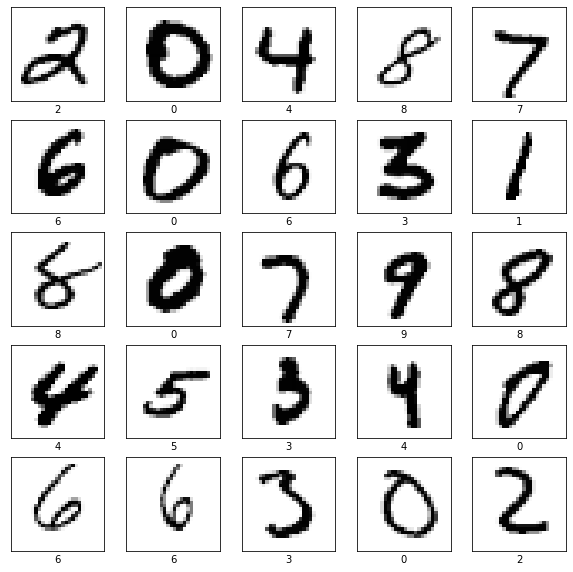

In [0]:
plt.figure(figsize=(10,10))
i=0
for image,label in dataset_test.take(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(label.numpy())
  plt.imshow(image.numpy().reshape(28,28),cmap=plt.cm.Greys)
 
  i+=1

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,input_shape=(28, 28, 1)),tf.keras.layers.MaxPooling2D((2, 2), strides=2),tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),tf.keras.layers.MaxPooling2D((2, 2), strides=2),tf.keras.layers.Flatten(),tf.keras.layers.Dense(units=128,activation=tf.nn.relu),tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
dataset_train=dataset_train.repeat().shuffle(num_train).batch(32)
dataset_test=dataset_test.batch(32)

In [0]:
import math

In [0]:
model.fit(dataset_train,epochs=5,steps_per_epoch=math.ceil(num_train/32))

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1192 - accuracy: 0.9634
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0377 - accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0274 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0142 - accuracy: 0.9955


In [0]:
loss,accu=model.evaluate(dataset_test,steps=math.ceil(num_test/32))

313/313 [==============================] - 3s 10ms/step - loss: 0.0302 - accuracy: 0.9908


In [0]:
print(accu)

0.9908000230789185


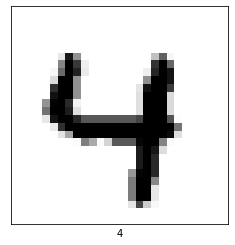

In [0]:
for img,lbl in dataset_test.take(25):
  prediction=model.predict(img)
  plt.imshow(img[2].numpy().reshape(28,28),cmap=plt.cm.Greys)
  plt.xlabel(np.argmax(prediction[2]))
  plt.xticks([])
  plt.yticks([])
  break